In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pytesseract as pt

pt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update this path if necessary


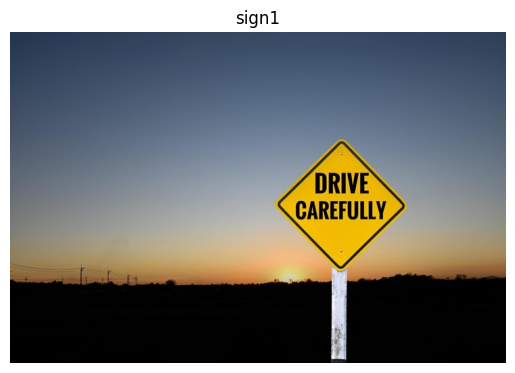

In [18]:
# Read the image
sign1 = cv.imread('sign1.jpg')

# Convert the image from BGR to RGB
sign1_rgb = cv.cvtColor(sign1, cv.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(sign1_rgb)
plt.title('sign1')
plt.axis('off')  # Hide the axis
plt.show()

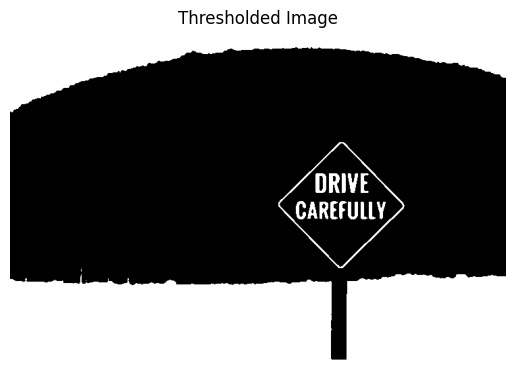

In [20]:
# We notice that the sign has black text, so we can try to grayscale, blur and threshold for text detection
gray = cv.cvtColor(sign1, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

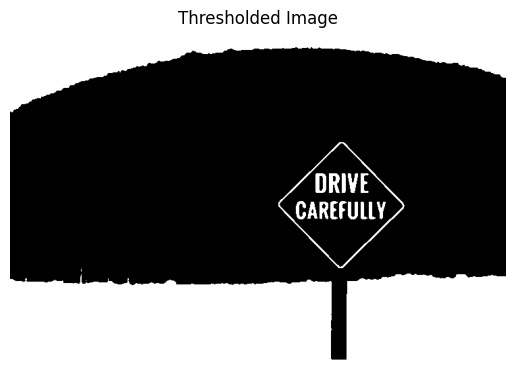

''

In [21]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Read the image
sign1 = cv.imread('sign1.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(sign1, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to binarize the image
_, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Use PyTesseract to recognize text
text = pt.image_to_string(thresh)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

# Return the recognized text
text

In [ ]:
# It looks like pytesseract is having some trouble looking at the sign. 
# There is a thin white border around the text. This could be causing the issue.
# Let's try to remove the border and see if pytesseract can recognize the text.


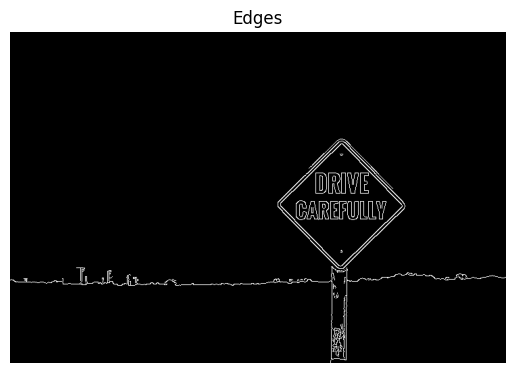

In [7]:
# Try detecting edges
sign1_gray = cv.cvtColor(sign1, cv.COLOR_BGR2GRAY)
edges = cv.Canny(sign1_gray, 100, 200)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')
plt.show()

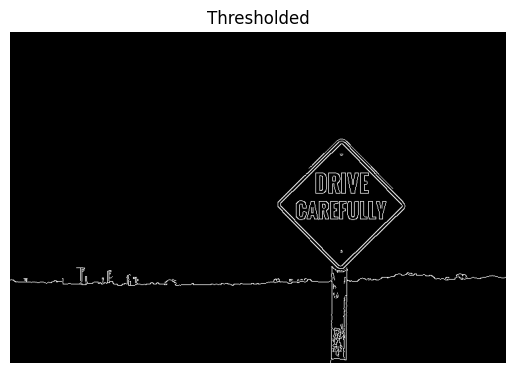

In [9]:
# Do thresholding on the edge detected image
_, thresh = cv.threshold(edges, 100, 255, cv.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')
plt.axis('off')
plt.show()